Top2Vec (Angelov, 2020) é um algoritmo de descoberta automática de tópicos em coleções de textos.
Ele combina representações vetoriais densas (embeddings) com técnicas de redução de dimensionalidade e clustering para encontrar grupos de documentos semanticamente relacionados, sem precisar definir o número de tópicos antecipadamente.

Diferente do LDA, que depende de bag-of-words e pré-definição de tópicos, o Top2Vec aprende os tópicos diretamente dos significados das palavras e documentos.

Como o Top2Vec funciona (etapas internas)

1) Geração dos embeddings
Cada documento e palavra é transformado em um vetor usando Word2Vec, Doc2Vec, Universal Sentence Encoder, ou BERT.
➜ Vetores de alta dimensão representam o significado de cada texto.

2) Redução de dimensionalidade (UMAP)
Usa a técnica UMAP (Uniform Manifold Approximation and Projection) para reduzir os vetores a um espaço menor, mantendo proximidade semântica.

3) Agrupamento (HDBSCAN)
Em seguida, aplica HDBSCAN, um algoritmo de clustering denso, que encontra automaticamente quantos tópicos existem — sem precisar informar esse número.

4) Criação dos tópicos
Para cada cluster de documentos, o modelo identifica as palavras mais próximas (semanticamente) no espaço vetorial e as usa como descritor do tópico.

Saída típica

O resultado é uma estrutura onde cada tópico possui:

- Palavras representativas

- Documentos associados

- Embeddings correspondentes

Exemplo:

Tópico 0 → ["filme", "cinema", "ator", "diretor"]
Tópico 1 → ["banco", "juros", "economia", "investimento"]

In [ ]:
!pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install --upgrade numpy top2vec --no-cache-dir
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 72.3 MB/s eta 0:00:00


2025-03-27 14:57:25,426 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-03-27 14:57:25,441 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model
2025-03-27 14:57:25,987 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-03-27 14:57:27,315 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-03-27 14:57:27,492 - top2vec - INFO - Finding dense areas of documen

Número de tópicos: 5

Tópico 1:
educacao, inovacao, popularidade, estao, como, economico, desenvolvimento, sao, brasileira, mercado, moderna, direitos, entre, problemas, anunciou, esportes, igualdade, importante, inteligencia, acoes, uma, precisa, etica, alimentar, espacial, sustentavel, sociedade, internacional, social, de, esta, para, futuro, profissional, tecnologias, industria, torna, forma, mundo, urbana, cresce, essencial, se, fundamental, transporte, na, global, tecnologia, cinema, ao

Tópico 2:
inovacao, educacao, estao, como, popularidade, desenvolvimento, economico, mercado, direitos, brasileira, sao, acoes, precisa, entre, anunciou, problemas, tecnologias, importante, moderna, de, etica, uma, sociedade, esportes, para, forma, mundo, alimentar, futuro, pandemia, cresce, sustentavel, tecnologia, esta, espacial, igualdade, torna, inteligencia, os, profissional, novos, transporte, industria, internacional, social, na, se, essencial, novas, fundamental

Tópico 3:
economico, educa

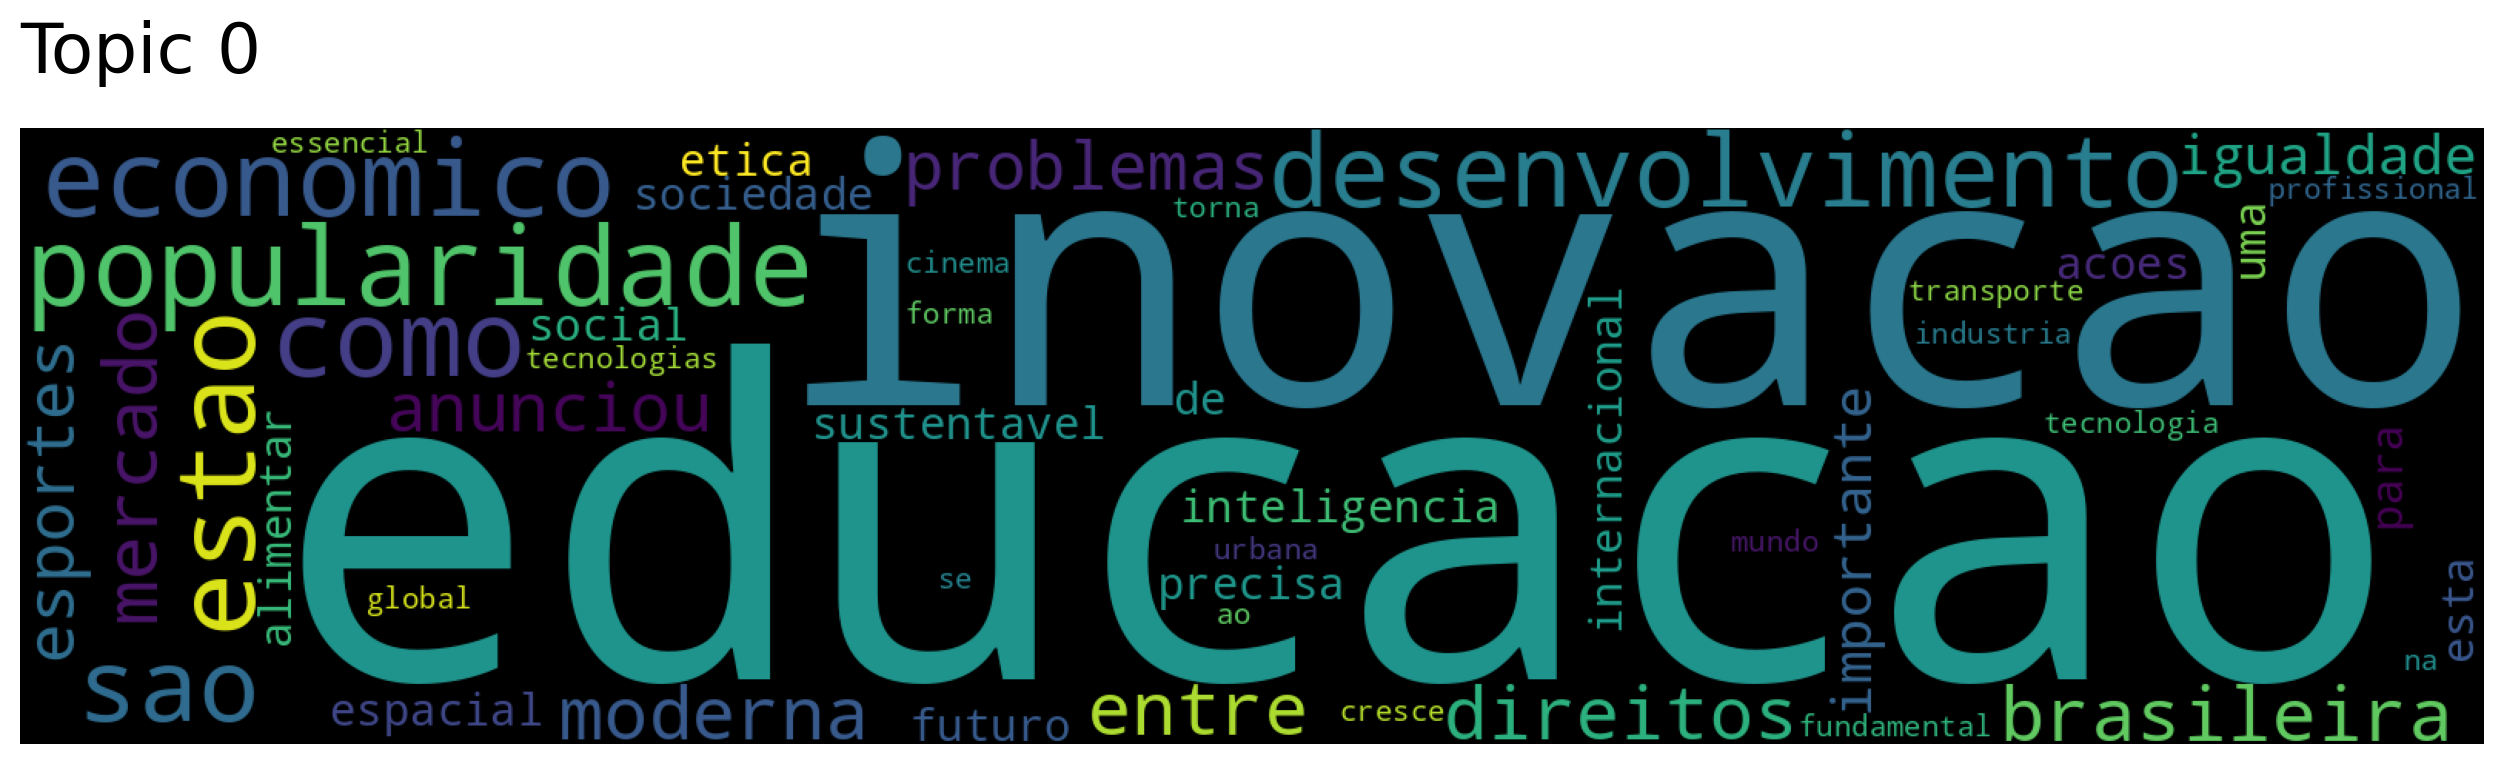

In [ ]:
from top2vec import Top2Vec

# Exemplo de textos
docs = [
    "O presidente anunciou novas medidas econômicas para conter a inflação.",
    "A seleção brasileira venceu a Argentina em um jogo emocionante.",
    "Novas tecnologias estão transformando a indústria automotiva.",
    "O aumento dos preços dos combustíveis preocupa os consumidores.",
    "A pandemia de COVID-19 trouxe desafios sem precedentes para a saúde pública.",
    "A empresa lançou um novo smartphone com tecnologia de ponta.",
    "O congresso aprovou uma reforma tributária para simplificar o sistema de impostos.",
    "Pesquisadores descobriram uma nova espécie de dinossauro na América do Sul.",
    "O mercado de ações caiu após a divulgação de dados econômicos negativos.",
    "A crise climática exige ações urgentes de todos os países.",
    "A inteligência artificial está revolucionando o setor financeiro.",
    "A vacina contra a gripe estará disponível nas clínicas a partir de outubro.",
    "Os cientistas estão desenvolvendo novos tratamentos para o câncer.",
    "O turismo espacial se torna uma realidade com novos voos comerciais.",
    "O governo anunciou um plano para melhorar a infraestrutura das estradas.",
    "O festival de cinema internacional atraiu milhares de espectadores.",
    "A educação à distância ganha popularidade entre estudantes e professores.",
    "O desemprego atinge níveis recordes em várias regiões do país.",
    "Os esportes eletrônicos se tornam uma grande indústria de entretenimento.",
    "O uso de energias renováveis cresce em todo o mundo.",
    "A biodiversidade está ameaçada pela destruição de habitats naturais.",
    "O desenvolvimento sustentável é crucial para o futuro do planeta.",
    "As startups de tecnologia recebem investimentos milionários.",
    "Os serviços de streaming mudaram a forma como consumimos mídia.",
    "A robótica avança com a criação de novos robôs autônomos.",
    "Os direitos humanos são fundamentais para uma sociedade justa.",
    "A exploração espacial continua com novas missões a Marte.",
    "A música clássica ainda encanta muitas pessoas ao redor do mundo.",
    "A literatura brasileira tem ganhado destaque internacional.",
    "O comércio eletrônico cresce rapidamente com a pandemia.",
    "A reciclagem é essencial para reduzir o impacto ambiental.",
    "A saúde mental é uma prioridade na sociedade moderna.",
    "O transporte público precisa de melhorias para atender à demanda.",
    "Os avanços na medicina prolongam a expectativa de vida.",
    "A cibersegurança se torna uma preocupação crescente para empresas.",
    "A arquitetura moderna incorpora tecnologias sustentáveis.",
    "Os jogos de tabuleiro voltam a ganhar popularidade entre jovens.",
    "A agricultura precisa de inovação para alimentar a população crescente.",
    "Os oceanos enfrentam problemas graves de poluição.",
    "A moda sustentável se torna uma tendência global.",
    "A energia solar é uma solução promissora para a crise energética.",
    "O voluntariado ajuda a fortalecer as comunidades locais.",
    "A democracia é essencial para a liberdade e igualdade.",
    "A nanotecnologia oferece novas possibilidades para a indústria.",
    "O cinema independente produz filmes inovadores e criativos.",
    "A igualdade de gênero é fundamental para o progresso social.",
    "Os veículos elétricos são o futuro do transporte.",
    "A preservação da história é importante para a identidade cultural.",
    "A educação financeira é crucial para o bem-estar econômico.",
    "A arte urbana transforma paisagens e engaja a comunidade.",
    "Os direitos dos animais são uma questão de ética e justiça.",
    "A inovação científica impulsiona o desenvolvimento econômico.",
    "A mobilidade urbana precisa de soluções inteligentes.",
    "O design thinking é uma abordagem eficaz para resolver problemas complexos.",
    "A inteligência emocional é importante para o sucesso pessoal e profissional.",
    "A segurança alimentar é um desafio global.",
    "Os esportes promovem a saúde e a integração social.",
    "A cooperação internacional é vital para a paz mundial.",
    "A economia circular é uma alternativa ao modelo tradicional de produção.",
    "A programação é uma habilidade valiosa no mercado de trabalho atual.",
    "A ética profissional é essencial em todas as áreas de atuação.",
    "A leitura é fundamental para o desenvolvimento cognitivo.",
    "A cultura digital está mudando a forma como interagimos."
]

# Verificar e filtrar documentos vazios ou curtos
docs = [doc for doc in docs if len(doc.strip()) > 10]

# Criar o modelo Top2Vec
# min_cluster_size	Quantidade mínima de documentos para formar um grupo (tópico).
# min_samples	Quantidade mínima de pontos próximos para considerar um ponto como parte do cluster.
model = Top2Vec(
    documents=docs,
    speed="deep-learn",
    workers=4,
    min_count=1,  # Aceita palavras com poucas ocorrências (bom para corpus pequeno)
    hdbscan_args={'min_cluster_size': 5, 'min_samples': 2}
)

#Outra alternativa
# Criar modelo com embedding pré-treinado
#model = Top2Vec(
#    documents=docs,
#    #embedding_model='distiluse-base-multilingual-cased-v2',
#    embedding_model='universal-sentence-encoder-multilingual',
#    min_count=1,
#    hdbscan_args={'min_cluster_size': 4, 'min_samples': 2}
#)

# Mostrar o número de tópicos encontrados
print("Número de tópicos:", model.get_num_topics())

# Mostrar os 5 tópicos mais relevantes
topics, topic_scores, topic_nums = model.get_topics(num_topics=5)
for i, topic in enumerate(topics):
    print(f"\nTópico {i+1}:")
    print(", ".join(topic))

# Gerar nuvem de palavras para um dos tópicos
# (ex: primeiro tópico = topic_num=0)
model.generate_topic_wordcloud(topic_num=0)